In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
dataset = pd.read_csv("SwedishMotorInsurance.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [97]:
dataset

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
...,...,...,...,...,...,...,...
2177,5,7,7,5,8.74,0,0
2178,5,7,7,6,16.61,0,0
2179,5,7,7,7,2.83,1,966
2180,5,7,7,8,13.06,0,0


In [98]:
print(x)

[[  1.     1.     1.     1.   455.13 108.  ]
 [  1.     1.     1.     2.    69.17  19.  ]
 [  1.     1.     1.     3.    72.88  13.  ]
 ...
 [  5.     7.     7.     7.     2.83   1.  ]
 [  5.     7.     7.     8.    13.06   0.  ]
 [  5.     7.     7.     9.   384.87  16.  ]]


In [122]:
from sklearn.impute import SimpleImputer                                                
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(x[:, 4:6])
x[:, 4:6] = imputer.transform(x[:, 4:6])

In [123]:
print(x)

[[  1.     1.     1.   455.13 108.  ]
 [  1.     1.     2.    69.17  19.  ]
 [  1.     1.     3.    72.88  13.  ]
 ...
 [  7.     7.     7.     2.83   1.  ]
 [  7.     7.     8.    13.06   0.  ]
 [  7.     7.     9.   384.87  16.  ]]


In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

'''
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
y = le.fit_transform(y)'''

'\nle = LabelEncoder()\nx[:,0] = le.fit_transform(x[:,0])\ny = le.fit_transform(y)'

In [125]:
print(x)

[[  1.     0.     0.   ...   1.   455.13 108.  ]
 [  1.     0.     0.   ...   2.    69.17  19.  ]
 [  1.     0.     0.   ...   3.    72.88  13.  ]
 ...
 [  0.     0.     0.   ...   7.     2.83   1.  ]
 [  0.     0.     0.   ...   8.    13.06   0.  ]
 [  0.     0.     0.   ...   9.   384.87  16.  ]]


In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [127]:
print(y)

[1515  881  559 ...   32    0 1208]


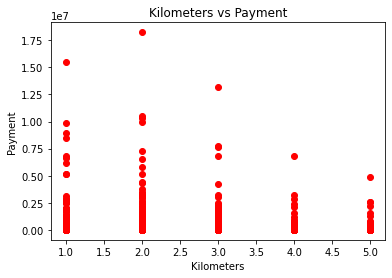

In [150]:
plt.scatter(dataset['Kilometres'], dataset['Payment'], color = 'red')
plt.title('Kilometers vs Payment')
plt.xlabel('Kilometers')
plt.ylabel('Payment')
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [163]:
print(x_train)

[[7.00000e+00 4.00000e+00 3.00000e+00 9.60000e-01 0.00000e+00]
 [3.00000e+00 7.00000e+00 6.00000e+00 5.23390e+02 1.40000e+01]
 [7.00000e+00 3.00000e+00 4.00000e+00 4.61800e+01 1.00000e+00]
 ...
 [4.00000e+00 4.00000e+00 1.00000e+00 9.30380e+02 5.30000e+01]
 [4.00000e+00 6.00000e+00 2.00000e+00 2.98730e+02 5.00000e+00]
 [3.00000e+00 7.00000e+00 2.00000e+00 1.68152e+03 7.10000e+01]]


In [164]:
print(y_train)

[     0  62013    756 ... 294693  16182 377529]


In [165]:
print(x_test)

[[ 2.    5.    5.   25.1   1.  ]
 [ 7.    5.    5.    0.7   0.  ]
 [ 7.    3.    2.    1.61  0.  ]
 ...
 [ 7.    5.    3.    0.2   0.  ]
 [ 5.    6.    3.   40.03  1.  ]
 [ 3.    3.    2.   31.55  3.  ]]


In [166]:
print(y_test)

[  31442       0       0  152944  251193   79870   12608       0    4521
   31442       0    1710       0    2288    9979   69277  168380  116227
   38663  233769  912421       0   38560   55595   23091   15229   12288
       0   88961       0   72563  731869    7647  447128   18455       0
 1097124       0  201401  153830   23893   57899    1144 5173923    4249
   45498   13026    7403 2133862   38542   42686       0  858717  329632
   58588  120719  436313  121196  775364    1450   42369  142262   56739
    6020    4855       0       0   13238       0    9525   23206   25329
       0  578831   69025       0       0     435 2249007   80714 4387841
  122651       0    4656 1044585  489424    2289    4868       0 7698320
    2193 2833885  391512    3000   31442 2873487   95879    4422       0
 1401833    6102    8064   31442   22495  623928    6387  234344       0
  155704    4225  124101  403488       0 1031429  785697  230920  135172
       0  364718   51380  604161    1684   86801   

In [167]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [168]:
print(x_train)

[[ 1.52063989 -0.01383842 -0.7554002  -0.17949419 -0.24403239]
 [-0.48579989  1.49541415  0.40769393 -0.09200896 -0.17334324]
 [ 1.52063989 -0.51692261 -0.36770216 -0.17192173 -0.23898317]
 ...
 [ 0.01581006 -0.01383842 -1.53079629 -0.02385511  0.02357655]
 [ 0.01581006  0.99232996 -1.14309825 -0.12963014 -0.21878626]
 [-0.48579989  1.49541415 -1.14309825  0.1019295   0.11446261]]


In [169]:
print(x_test)

[[-0.98740984  0.48924577  0.01999589 -0.17545175 -0.23898317]
 [ 1.52063989  0.48924577  0.01999589 -0.17953773 -0.24403239]
 [ 1.52063989 -0.51692261 -1.14309825 -0.17938535 -0.24403239]
 ...
 [ 1.52063989  0.48924577 -0.7554002  -0.17962146 -0.24403239]
 [ 0.51742     0.99232996 -0.7554002  -0.1729516  -0.23898317]
 [-0.48579989 -0.51692261 -1.14309825 -0.17437165 -0.22888471]]


In [170]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [171]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 3.68872950e+03  8.23855708e+03  1.13606978e+04  2.65426922e+05
  2.37735748e+05  7.87200195e+04  1.21104692e+04  4.20894007e+03
  2.26925685e+03  1.77307257e+04  3.11511512e+03  5.20454408e+03
  1.05358572e+04  7.19214582e+03  1.48891395e+04  1.95702194e+04
  7.02898349e+04  1.16263092e+05  2.74914785e+04  2.69705577e+05
  7.47049629e+05  3.20910095e+03  2.11969822e+04  5.76718383e+04
  3.16783228e+04  3.89703313e+04  2.11169584e+04  1.51072893e+04
  8.65687078e+04  1.76552943e+03  7.52926087e+04  5.57103263e+05
 -1.19900986e+02  3.89168185e+05  5.08424082e+04  1.53691958e+04
  1.07085486e+06  7.91259939e+03  3.51320339e+05  1.14344116e+05
  2.35822599e+04  6.94900644e+04  1.15006054e+03  5.52217687e+06
  4.53405764e+03  3.01196570e+04  2.62054587e+04  1.72926265e+04
  1.89834499e+06  7.06975006e+03  2.12778762e+04  5.48285323e+03
  8.92078497e+05  3.27946974e+05  4.86613926e+04  1.72905812e+05
  4.01952467e+05  1.05598059e+05  6.22277609e+05  7.91087114e+03
  4.71975690e+04  1.51398

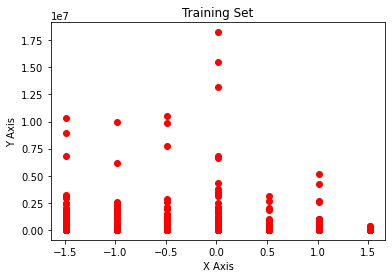

In [192]:
plt.scatter(x_train[:, 0], y_train, color = 'red')
#plt.plot(x_train[:, 0], regressor.predict(x_train), color = 'blue')
plt.title('Training Set')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

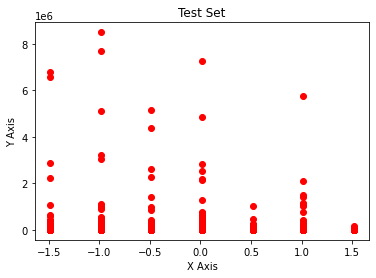

In [193]:
plt.scatter(x_test[:, 0], y_test, color = 'red')
#plt.plot(x_train[:, 0], regressor.predict(x_train), color = 'blue')
plt.title('Test Set')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

In [181]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
regressor2 = LinearRegression()
regressor2.fit(x_poly, y)
regressor2.coef_

array([-1.30916595e-01,  1.03610852e+00,  1.99911891e-02, -1.85337268e-03,
        2.95484981e-01,  4.54807799e-02, -1.89786805e-02, -1.54019410e-02,
       -1.60676693e-02,  6.08015929e-01,  8.89251798e-02, -1.35351764e-02,
       -1.38492280e-02,  6.83156996e-01,  8.44045900e-02, -1.40397525e-02,
        5.59507398e-01,  1.17274216e-01, -3.68239651e-01,  1.07081716e+01,
        2.37748875e+00, -1.35190041e-01, -1.05081735e-01, -1.12528603e-01,
        1.74827150e+00,  2.55647943e-01, -9.19211525e-02, -9.12271627e-02,
        1.22843594e+00,  1.01689838e-01, -1.09951999e-01,  1.56149657e+00,
        2.83752622e-01,  3.29433600e-02, -5.14959486e-01,  2.31328603e+00,
       -8.94068258e-02, -8.44939326e-02,  1.79541377e+00,  2.14245619e-01,
       -9.34538440e-02,  1.11448646e+00,  2.33071417e-01,  3.51494297e-02,
       -1.18775915e+00,  2.37822216e+00, -1.04094229e-01,  1.56184118e+00,
        6.19021111e-01,  3.40745762e-02, -8.10975374e-01,  2.63800721e+00,
        1.39109738e-05, -

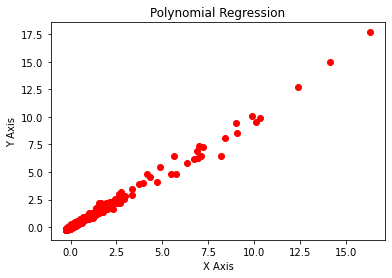

In [194]:
plt.scatter(x[:, 0], y, color='red')
#plt.plot(x[:, 0], regressor2.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()



In [188]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = y.reshape(len(y),1)
y = sc_y.fit_transform(y)

In [189]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

c:\Users\Shreya Soni\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

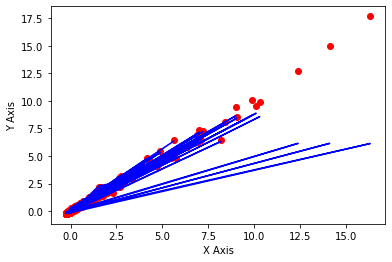

In [191]:
plt.scatter(x[:, 0], y, color = 'red')
plt.plot(x[:, 0], regressor.predict(x).reshape(-1,1), color = 'blue')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()